/Users/jongho/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:219: ComplexWarning: Casting complex values to real discards the imaginary part
  return data.astype(dtype)


MSE in Substrate: 0.022590878768771406


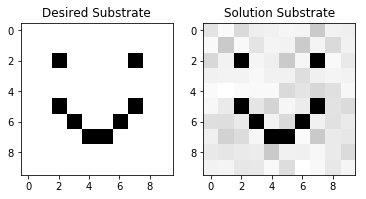

In [134]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from cvxpy import *

np.random.seed(1)
m = 5
# n = 50
I_high = 0.75
I_low = 0.25
# S = np.random.randint(0, 2, size = (5,5))
S = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
			  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
			  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
k,l = S.shape
n = np.prod(S.shape)
S_vec = S.flatten()   # Flatten into vector

# Generate light wavelengths
p_light = []
for i in range(m):
	data = np.random.randn(n,2)
	comp = np.apply_along_axis(lambda args: [complex(*args)], 1, data)
	p_light += [comp]
Phis = [np.asmatrix(scipy.linalg.circulant(p)) for p in p_light]
# Phis_split = [(np.real(Phi), np.imag(Phi)) for Phi in Phis]

# Solve convex relaxation
M = Semidef(n)
obj = trace(M)
I = sum([diag(Phi.H*M*Phi) for Phi in Phis])
# I = sum([Preal.T*M*Preal + Pimag.T*M*Pimag for Preal, Pimag in Phis_split])
cons = [I[S_vec == 1] >= I_high, I[S_vec == 0] <= I_low]
prob = Problem(Minimize(obj), cons)
prob.solve("MOSEK")

# Retrieve solution
I_sol = np.real(I.value)
S_sol = np.reshape(I_sol, (k,l))   # Reshape into 2-D image
print("MSE in Substrate: {}".format(np.linalg.norm(S - S_sol)**2/n))

# Display resulting substrate
f, axarr = plt.subplots(1,2)
axarr[0].imshow(S, cmap = "Greys", interpolation = "nearest")
axarr[0].set_title("Desired Substrate")
axarr[1].imshow(S_sol, cmap = "Greys", interpolation = "nearest")
axarr[1].set_title("Solution Substrate")
plt.show()

In [135]:
M_random = M.value
M_random

matrix([[ 1.02616951e-04,  1.90022853e-04, -6.94249728e-05, ...,
         -7.44380286e-05, -2.95532532e-04,  2.66506467e-05],
        [ 1.90022853e-04,  3.83110408e-04, -1.70364307e-04, ...,
         -6.27288477e-05, -5.51767368e-04,  7.01570346e-05],
        [-6.94249728e-05, -1.70364307e-04,  1.02919803e-04, ...,
         -5.01648853e-05,  2.05983373e-04, -4.58769787e-05],
        ...,
        [-7.44380286e-05, -6.27288477e-05, -5.01648853e-05, ...,
          2.34598660e-04,  2.03514075e-04,  3.06985373e-05],
        [-2.95532532e-04, -5.51767368e-04,  2.05983373e-04, ...,
          2.03514075e-04,  8.51760987e-04, -7.97599565e-05],
        [ 2.66506467e-05,  7.01570346e-05, -4.58769787e-05, ...,
          3.06985373e-05, -7.97599565e-05,  2.07797932e-05]])

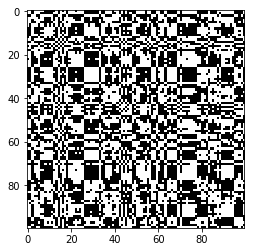

In [145]:
plt.imshow(np.sign(M_random), cmap='gray')
plt.show()

/Users/jongho/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:219: ComplexWarning: Casting complex values to real discards the imaginary part
  return data.astype(dtype)


MSE in Substrate: 0.02007265832448427


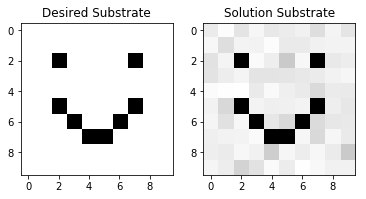

In [137]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from cvxpy import *


np.random.seed(1)
m = 5
# n = 50
I_high = 0.75
I_low = 0.25
# S = np.random.randint(0, 2, size = (5,5))
S = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
			  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
			  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
k,l = S.shape
n = np.prod(S.shape)
S_vec = S.flatten()   # Flatten into vector

# Generate light wavelengths
z = np.arange(100) # for bessel function input
p_light = []
for i in range(m):
	data = np.random.randn(n,2)
	comp = np.apply_along_axis(lambda args: [complex(*args)], 1, data)
    # create order 1 bessel function and add it together
	p_light += [comp + scipy.special.jv(1, z).reshape((n,1))] 
Phis = [np.asmatrix(scipy.linalg.circulant(p)) for p in p_light]
# Phis_split = [(np.real(Phi), np.imag(Phi)) for Phi in Phis]


# Solve convex relaxation
M = Semidef(n)
obj = trace(M)
I = sum([diag(Phi.H*M*Phi) for Phi in Phis])
# I = sum([Preal.T*M*Preal + Pimag.T*M*Pimag for Preal, Pimag in Phis_split])
cons = [I[S_vec == 1] >= I_high, I[S_vec == 0] <= I_low]
prob = Problem(Minimize(obj), cons)
prob.solve("MOSEK")

# Retrieve solution
I_sol = np.real(I.value)
S_sol = np.reshape(I_sol, (k,l))   # Reshape into 2-D image
print("MSE in Substrate: {}".format(np.linalg.norm(S - S_sol)**2/n))

# Display resulting substrate
f, axarr = plt.subplots(1,2)
axarr[0].imshow(S, cmap = "Greys", interpolation = "nearest")
axarr[0].set_title("Desired Substrate")
axarr[1].imshow(S_sol, cmap = "Greys", interpolation = "nearest")
axarr[1].set_title("Solution Substrate")
plt.show()

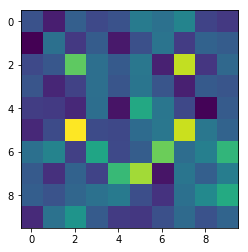

In [179]:
V = np.sign(M_random)
temp = []
for Phi in Phis:
    vec = Phi.H.dot(V).dot(Phi)
    temp.append(np.diag(vec))

result = np.sum(temp, axis=0)
result = np.real(result)
result = result.reshape((k,l))

plt.imshow(result)
plt.show()


In [148]:
M_bessel = M.value
sum([diag(Phi.H*np.sign(M_bessel)*Phi) for Phi in Phis])

matrix([[ 5.53525265e-05,  1.01328720e-04, -8.58762163e-06, ...,
         -8.91768449e-05, -1.85036799e-04, -4.43660746e-05],
        [ 1.01328720e-04,  1.97660612e-04, -4.39621862e-05, ...,
         -1.09740712e-04, -3.34337124e-04, -6.11067083e-05],
        [-8.58762163e-06, -4.39621862e-05,  6.68734846e-05, ...,
         -1.10336509e-04,  1.85196484e-05, -3.97854662e-05],
        ...,
        [-8.91768449e-05, -1.09740712e-04, -1.10336509e-04, ...,
          3.78917537e-04,  3.17405067e-04,  1.59892161e-04],
        [-1.85036799e-04, -3.34337124e-04,  1.85196484e-05, ...,
          3.17405067e-04,  6.20132967e-04,  1.55563007e-04],
        [-4.43660746e-05, -6.11067083e-05, -3.97854662e-05, ...,
          1.59892161e-04,  1.55563007e-04,  6.87897249e-05]])

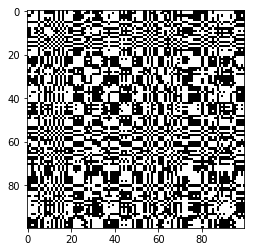

In [144]:
plt.imshow(np.sign(M_bessel), cmap='gray')
plt.show()

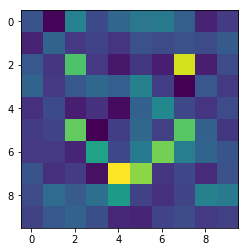

In [183]:
# take sign(M) as original mask
V = np.sign(M_bessel)
temp = []
for Phi in Phis:
    vec = Phi.H.dot(V).dot(Phi)
    temp.append(np.diag(vec))

result_bessel = np.sum(temp, axis=0)
result_bessel = np.real(result_bessel)
result_bessel = result_bessel.reshape((k,l))

plt.imshow(result_bessel)
plt.show()

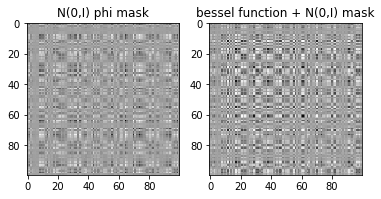

In [143]:
# Display resulting substrate
f, axarr = plt.subplots(1,2)
axarr[0].imshow(M_random, cmap = "Greys", interpolation = "nearest")
axarr[0].set_title("N(0,I) phi mask")
axarr[1].imshow(M_bessel, cmap = "Greys", interpolation = "nearest")
axarr[1].set_title("bessel function + N(0,I) mask")
plt.show()

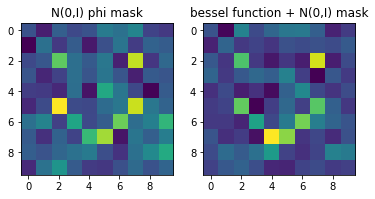

In [184]:
# Display resulting substrate
f, axarr = plt.subplots(1,2)
axarr[0].imshow(result, interpolation = "nearest")
axarr[0].set_title("N(0,I) phi mask")
axarr[1].imshow(result_bessel, interpolation = "nearest")
axarr[1].set_title("bessel function + N(0,I) mask")
plt.show()

In [120]:
# Case when domain of mask m is in {-1, 1} 
#  ==> constraint diag(M) == 1 added

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from cvxpy import *

np.random.seed(1)
m = 5
# n = 50
I_high = 1
I_low = 0
# S = np.random.randint(0, 2, size = (5,5))
S = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
			  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
			  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
			  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
#S = np.where(S == 0, -1, 1)
k,l = S.shape
n = np.prod(S.shape)
S_vec = S.flatten()   # Flatten into vector

# Generate light wavelengths
p_light = []
for i in range(m):
	data = np.random.randn(n,2)
	comp = np.apply_along_axis(lambda args: [complex(*args)], 1, data)
	p_light += [comp]
Phis = [np.asmatrix(scipy.linalg.circulant(p)) for p in p_light]
# Phis_split = [(np.real(Phi), np.imag(Phi)) for Phi in Phis]

# Solve convex relaxation
M = Semidef(n)
obj = trace(M)
I = sum([diag(Phi.H*M*Phi) for Phi in Phis])
# I = sum([Preal.T*M*Preal + Pimag.T*M*Pimag for Preal, Pimag in Phis_split])
cons = [I[S_vec == 1] >= I_high, I[S_vec == 0] <= I_low]
cons += [diag(M)==np.ones((n,1))] # diagonal constraint added
prob = Problem(Minimize(obj), cons)
prob.solve("MOSEK")

# Retrieve solution
I_sol = np.real(I.value)
S_sol = np.reshape(I_sol, (k,l))   # Reshape into 2-D image
print("MSE in Substrate: {}".format(np.linalg.norm(S - S_sol)**2/n))

# Display resulting substrate
f, axarr = plt.subplots(1,2)
axarr[0].imshow(S, cmap = "Greys", interpolation = "nearest")
axarr[0].set_title("Desired Substrate")
axarr[1].imshow(S_sol, cmap = "Greys", interpolation = "nearest")
axarr[1].set_title("Solution Substrate")
plt.show()

prob.value

inf

In [ ]:
#v = np.arange(10)
#v = v - int(np.mean(v))
#np.polynomial.hermite.hermvander(v,9)
#np.polynomial.hermite.hermvander2d(v,v,[4,1])

z = np.arange(100)
fig = plt.figure()
plt.plot(scipy.special.jv(1, z)) # bessel function with order 1
plt.title("First order bessel function")
plt.show()
scipy.special.jv(1, z).reshape((n,1)).shape